In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

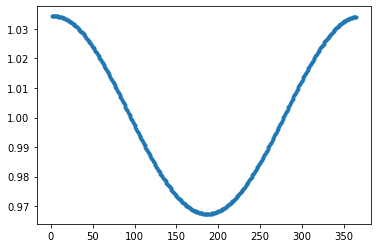

In [2]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

plt.plot(dayOfYear,relPower,'.')

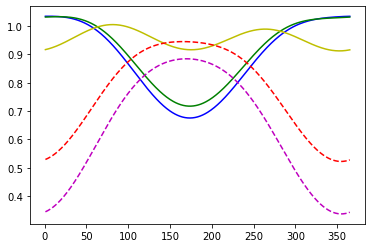

In [14]:
# tilt angle of the earth in 2020
tiltAngle = -23.44*np.pi/180.0

angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

angleBotswana = -22.3285*np.pi/180.0 - angle
angleMadagascar = -18.7669*np.pi/180.0 - angle
angleColombia = 4.5709*np.pi/180.0 - angle
angleAustria = 47.5162*np.pi/180.0 - angle
angleJapan = 36.2048 *np.pi/180.0 - angle

#plt.plot(dayOfYear,angleNewportNews)
#plt.plot(dayOfYear,angleEquator)

plt.plot(dayOfYear,(np.cos(angleBotswana)*relPower),'b')
plt.plot(dayOfYear,(np.cos(angleMadagascar)*relPower),'g')
plt.plot(dayOfYear,(np.cos(angleColombia)*relPower), 'y')
plt.plot(dayOfYear,(np.cos(angleAustria)*relPower),'m--')
plt.plot(dayOfYear,(np.cos(angleJapan)*relPower),'r--')

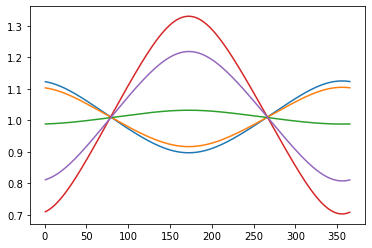

In [15]:
from Sun import Sun

coords = {'longitude': 24.6849, 'latitude': -22.3285}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionBot = dayLength/12.0

coords = {'longitude': 46.8691, 'latitude': -18.7669}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionMad = dayLength/12.0

coords = {'longitude': 74.2973, 'latitude': 4.5709}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionCol = dayLength/12.0

coords = {'longitude': 14.5501, 'latitude': 47.5162}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionAus = dayLength/12.0

coords = {'longitude': 138.2529, 'latitude': 36.2048}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionJap = dayLength/12.0


plt.plot(dayOfYear,lengthCorrectionBot)
plt.plot(dayOfYear,lengthCorrectionMad)
plt.plot(dayOfYear,lengthCorrectionCol)
plt.plot(dayOfYear,lengthCorrectionAus)
plt.plot(dayOfYear,lengthCorrectionJap)

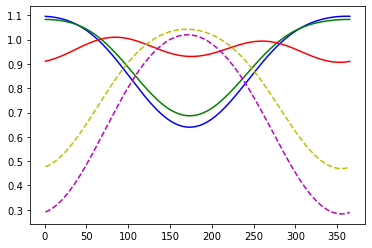

In [17]:
tempBotTheory = (np.cos(angleBotswana)*relPower*np.sqrt(lengthCorrectionBot))
tempMadTheory = (np.cos(angleMadagascar)*relPower*np.sqrt(lengthCorrectionMad))
tempColTheory = (np.cos(angleColombia)*relPower*np.sqrt(lengthCorrectionCol))
tempAusTheory = (np.cos(angleAustria)*relPower*np.sqrt(lengthCorrectionAus))
tempJapTheory = (np.cos(angleJapan)*relPower*np.sqrt(lengthCorrectionJap))

plt.plot(dayOfYear,tempBotTheory,'b')
plt.plot(dayOfYear,tempMadTheory,'g')
plt.plot(dayOfYear,tempColTheory,'r')
plt.plot(dayOfYear,tempAusTheory,'m--')
plt.plot(dayOfYear,tempJapTheory,'y--')

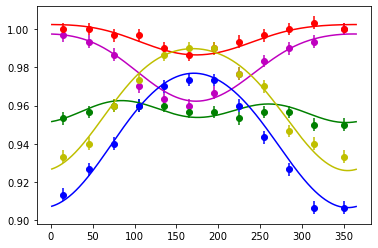

In [538]:
tempBot = np.array([27,26,25,23,18,16,15,17,20,22,24,25])+273.15
tempMad = np.array([27,27,27,26,26,24,23,24,25,26,27,28])+273.15
tempCol = np.array([12,13,14,15,15,15,14,14,13,14,14,12])+273.15
tempAus = np.array([-1,1,5,9,15,18,19,19,15,10,5,-1])+273.15
tempJap = np.array([7,7,9,15,19,23,24,24,20,18,11,9])+273.15

error = np.array([1 for i in range(12)])

mean = tempBot.max()
tempBot=tempBot/mean
tempMad=tempMad/mean
tempCol=tempCol/mean
tempAus = tempAus/mean
tempJap = tempJap/mean
error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,tempBot,yerr=error,fmt='mo')
plt.errorbar(month,tempMad,yerr=error,fmt='ro')
plt.errorbar(month,tempCol,yerr=error,fmt='go')
plt.errorbar(month,tempAus,yerr=error,fmt='bo')
plt.errorbar(month,tempJap,yerr=error,fmt='yo')

plt.plot(dayOfYear,(tempBotTheory-1)/13+0.99,'m')
plt.plot(dayOfYear,(tempMadTheory-1)/25+0.999,'r')
plt.plot(dayOfYear,(tempColTheory-1)/9+0.9615,'g')
plt.plot(dayOfYear,(tempAusTheory-1)/10.5+0.975,'b')
plt.plot(dayOfYear,(tempJapTheory-1)/9+0.985,'y')